# <font color=cyan><b>KC HOUSING PREDICTION MODEL.</b></font> 




<img src="https://cdn.tollbrothers.com/communities/14390/images-resized/Canopy_Cottages_NORTH_GREEN_STREETSCAPE_4140_WA-1_920.jpg"/>



## <font color=green><i>1. Business understanding</i></font> 

### 1.1 Introduction
King County is a vibrant community in Seattle, Washington, with residents from diverse backgrounds, representing countries from around the world. The real estate market in King County exhibits considerable variation in house prices due to multiple factors such as property features, location, and market trends. The complexity and dynamism of the market make it challenging to predict house prices accurately

    References: 
    'https://kingcounty.gov/en/legacy/audience/employees/careers', 





### 1.2 Business problem

The unpredictability of house prices poses a significant challenge for various stakeholders, including potential homebuyers and real estate agents. These stakeholders require accurate and reliable house price predictions to make informed decisions. Homebuyers need to understand market trends to make prudent purchasing decisions while the  real estate agents need accurate data to advise their clients effectively, 

### 1.3 Objectives

Our role as data scientists is to develop a  house price prediction model that meet the following objects-:

- Determine which features have the most significant impact on house prices.
- Build a predictive model to estimate house prices based on features.
- Examine the correlations between different features and house prices to identify strong relationships.
- Determine how house prices vary with reference to geographical location.



## <font color=green><i>2. Data understanding</i></font> 

To understand the dataset we are on, we first import necessary libraries and then load dataset to have a view of the few rows of the dataset.

### 2.1 Importing Libraries

In [100]:
#import libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


### 2.2 Loading the dataset

In [101]:
#Loading dataset
df = pd.read_csv(r"C:\Users\AHB\Desktop\phase2\CHECKPOINTS\dsc-phase-2-project\data\kc_house_data.csv")
df.sample(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1989,5103900045,7/25/2014,299000.0,3,1.75,1730,14270,1.0,0.0,0.0,...,7,1730,0.0,1959,0.0,98065,47.5318,-121.833,1600,11232
11282,4058802255,7/24/2014,219950.0,2,1.00,990,6448,1.0,0.0,0.0,...,7,990,0.0,1948,0.0,98178,47.5031,-122.245,1130,7200
4256,5309101050,11/26/2014,489950.0,3,2.00,1580,4010,1.0,0.0,0.0,...,7,790,790.0,1909,0.0,98117,47.6769,-122.371,1350,5350
7462,6648500440,11/21/2014,319000.0,4,2.25,2380,7400,1.0,0.0,0.0,...,8,1760,620.0,1979,0.0,98042,47.3555,-122.149,1940,7400
389,2890100060,8/1/2014,385000.0,4,1.50,2040,10726,1.0,0.0,0.0,...,7,1380,660.0,1954,NaN,98177,47.7720,-122.358,1610,10020
1693,2822079012,4/10/2015,340000.0,3,1.75,1740,46580,1.0,0.0,0.0,...,7,1740,0.0,1980,0.0,98010,47.3583,-121.927,1576,54685
19236,8650100120,8/29/2014,339950.0,5,2.50,2990,7292,2.0,0.0,0.0,...,8,2990,0.0,1990,0.0,98042,47.3604,-122.091,2150,8190
1271,1822069116,12/17/2014,590000.0,3,2.50,2400,99752,1.0,0.0,0.0,...,9,2400,0.0,1996,0.0,98058,47.3917,-122.084,2800,98010
18232,4025300360,3/26/2015,349500.0,3,2.00,1130,16875,1.0,NaN,0.0,...,7,1130,0.0,1947,0.0,98155,47.7489,-122.300,1600,14300
12141,4036801070,8/4/2014,367400.0,4,1.50,1280,7400,1.0,NaN,0.0,...,7,1280,0.0,1958,0.0,98008,47.6023,-122.123,1310,7400


### 2.3 Data description


The dataset provided contains house sale prices for King County, Washington, along with various features that describe each property. This dataset is well-suited for our objectives due to the diverse range of attributes it includes, which are essential for accurately predicting house prices.

 Each column in the dataset represents a specific feature that can influence the house price. Below is a description of each feature:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



### 2.3 Presenting the size of the dataset

In [102]:
print("No: of rows is", df.shape[0])
print('No: of  columns is ', df.shape[1])

No: of rows is 21597
No: of  columns is  21


### 2.4 Justification of feature inclusion



open for discussion

### 2.5 limitations of the data that have implications for the project

 - Accuracy - The data may not be 100% accurate as we do not have information of the processes that were used to collect the data.
 - Missing values on certain collumns
 - Potential of errors during data capture and entry.
 - Omiited variables
  


## <font color=green><i>3. Data preparation</i></font> 

Data preparation is a critical step in the data analysis process, involving the cleaning, transforming, and organizing of raw data to make it suitable for analysis. Proper data preparation ensures that the data is accurate, consistent, and formatted correctly, which is essential for building reliable and valid models


In [103]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The above output gives an overview of the  contents of each column.
Bathrooms data is shown as float. while this is logically wrong, we round this to whole number for easy analysis and manipulation.

In [104]:
#Rounding of the bathroom data to wole number.
df["bathrooms"] = df.bathrooms.round()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.0,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.0,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,1.0,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.0,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [105]:
#viewing the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [106]:
df['date'] = pd.to_datetime(df['date'])
# df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Viewing the dataset of each column as illustrated above gives us a summary of each type of out column, with most of the collumn showing and int type.

In [107]:
#getting the statistical summary of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The output shown above provides a quick overview of the data, helping us understand its basic characteristics and identify potential issues that need to be addressed during data preparation.

In [108]:
#detecting missing values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

we have three column with null value:
 - waterfront 2,376
 - view 64
 - yr of renovation

In [109]:
# assessing the waterfront category
df["waterfront"].value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

The "waterfront" column appears to be binary, indicating whether a property is on the waterfront (1) or not (0).

 - There are 19,075 properties that are not on the waterfront (0.0).
 - There are 146 properties that are on the waterfront (1.0)


In [110]:
# Convert numerical waterfront data to categorical with labels.

df["waterfront"] = pd.Categorical(df["waterfront"], categories=[0, 1], ordered=False)
df["waterfront"].cat.rename_categories({0: 'No', 1: 'Yes'}, inplace=True)

# # Verify the changes
print(df["waterfront"].value_counts())


No     19075
Yes      146
Name: waterfront, dtype: int64


In [111]:
# assessing the waterfront category
df["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [112]:
#filling the missing value of view with 5

df["view"]=df["view"].fillna(5)


In [113]:
#converting the view column to categorical
df["view"] = df["view"].astype('category')


In [114]:
#Renaming the categories
df["view"] = df["view"].cat.set_categories([0, 1, 2, 3, 4, 5])
df["view"].cat.rename_categories({0: 'No view', 1: 'Poor view', 2: 'Average view', 3: 'Good view', 4: 'Excellent view',5: 'Unknown'}, inplace=True)

print(df["view"].value_counts())


No view           19422
Average view        957
Good view           508
Poor view           330
Excellent view      317
Unknown              63
Name: view, dtype: int64


In [115]:
#Filling the missing value of yr_renovated with 0 assuming that NaN means no renovation.

df['yr_renovated'].fillna(0, inplace=True)

### Checking for dulicate rows

In [117]:
#checkingfor duplicate values

df.duplicated().sum()

0

### Determining the correlation coefficient of the price column

From the above output of checking duplicate values, we can conclude that there are no duplicate values in the dataset provided.

In [126]:
# Compute correlation matrix

corr_matrix = df.corr()

# Extract the correlations with 'price' and sort in descending order
price_relation = corr_matrix["price"].sort_values(ascending=False)
print(price_relation)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64


The output above shows the streghth of the house features in relation to price.
- sqdt_living exhibits the highest correlation value to price.
- Id Exhibits the lowerst correlation value to price

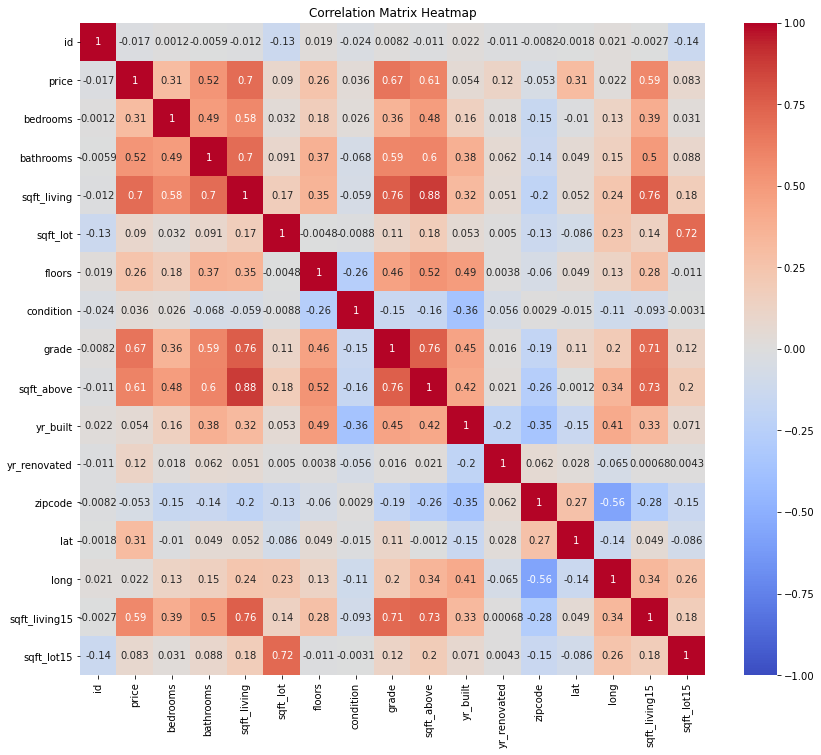

In [127]:
# Correlation heatmap of columns

correlation_matrix =  df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Strong Positive Correlations:

- sqft_living (0.70): Indicates that as the square footage of living space increases, the price tends to increase.
- grade (0.67): Suggests that higher grades (likely indicating better quality or more luxurious homes) are associated with higher prices.
- sqft_above (0.61): Indicates that the square footage of space above ground level is positively correlated with price.
- bathrooms (0.52): More bathrooms are associated with higher price

Moderate Positive Correlations:
- bedrooms (0.31): More bedrooms are associated with higher prices, but the correlation is not as strong as with other features.
- floors (0.26): Houses with more floors tend to have higher prices

Negative Correlations:

- yr_built: Negatively correlated with condition (-0.36): Suggests that older homes tend to be in worse condition.
- zipcode:Negatively correlated with sqft_above (-0.26) and sqft_living (-0.15), indicating some regional variations in home sizes.

### Dropping unnecessary columns.


we can agree as a team

## <font color=green><i>4. Modelling</i></font> 

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Defining  features and target
features = ['sqft_living', 'grade', 'bathrooms', 'floors','condition']
X = df[features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 60462871186.57588


## <font color=green><i>5.Regression results</i></font> 

In [ ]:
# #determine if houses with waterfront have any effect to price.
# sns.boxplot(df['waterfront'], df['price'])
# plt.title("'Boxplot 'Waterfront' vs 'Price'")

Houses with waterfront tend to have a higher median price compared to those without waterfront. This suggests that being on the waterfront adds significant value to a property

### Derterminig if the sqft living is positively or negatively correalted to price

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

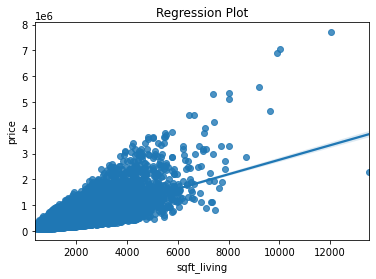

In [136]:
sns.regplot(df['sqft_living'], df['price'])
plt.title("Regression Plot")

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

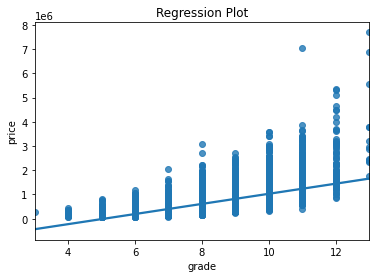

In [137]:
sns.regplot(df['grade'], df['price'])
plt.title("Regression Plot")

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

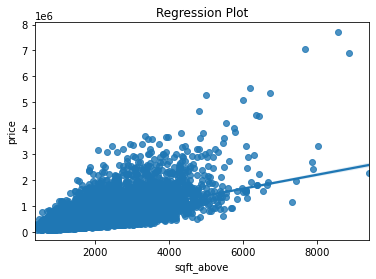

In [138]:
sns.regplot(df['sqft_above'], df['price'])
plt.title("Regression Plot")

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

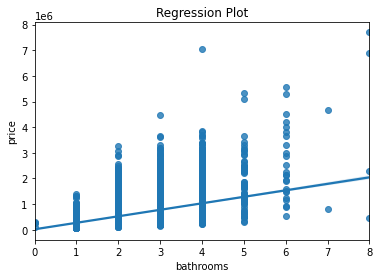

In [139]:
sns.regplot(df['bathrooms'], df['price'])
plt.title("Regression Plot")

c:\Users\AHB\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

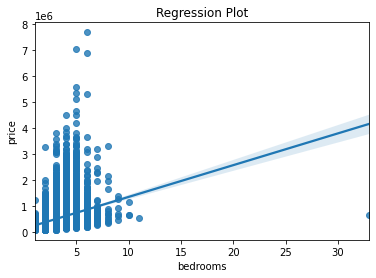

In [140]:
sns.regplot(df['bedrooms'], df['price'])
plt.title("Regression Plot")

#### Interpretting coeficient

The selected features shows a positive corelation coefficient to price.

From the output produced, we  can conclude that the sqft_above has a postive correlation to price.